# Proyek Analisis Data: Bike Sharing
- **Nama:** Riffaldi Rahmat
- **Email:** riffaldir46@gmail.com
- **ID Dicoding:** riffaldi_rahmat

## Menentukan Pertanyaan Bisnis

* apakah suhu(temp) berpengaruh terhadap penyewaan?
* pada musim apa yang jumlah penyewaan terbanyak dan sedikit?
* berapakah rata-rata penyewaan sepeda per bulan?








## Import Semua Packages/Library yang Digunakan

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [42]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Riffaldir/Proyek_Analisis_Data/refs/heads/master/dashboard/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Pada gathering data ini yaitu menampilkan data dari dataset utama yang digunakan untuk menjawab pertanyaan yang ada

### Assesing Data


Menilai tabel day_df

In [43]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- seperti yang ada pada modul dicoding yang telah dipelajari type data pada dteday seharusnya datetime


In [44]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0



*   tidak terdapat missing value dari data








In [45]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0




*   tidak ada data duplikasi




In [46]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Karena pada assesing data hanya terdapat kesalahan tipe data maka pada tahap cleaning data hanya melakukan perbaikan tipe data

In [47]:
datetime_columns_day =['dteday']

for column in datetime_columns_day:
  day_df[column] = pd.to_datetime(day_df[column])

In [48]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa


- tipe data dteday berubah menjadi datetime


## Exploratory Data Analysis (EDA)

### Explore day_df

In [49]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
491,492,2012-05-06,2,1,5,0,0,0,2,0.562500,0.546737,0.740000,0.149879,2135,4224,6359
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
191,192,2011-07-11,3,0,7,0,1,1,1,0.762500,0.729804,0.635833,0.282337,723,3363,4086
492,493,2012-05-07,2,1,5,0,1,1,2,0.537500,0.527142,0.664167,0.230721,1008,5265,6273
148,149,2011-05-29,2,0,5,0,0,0,1,0.667500,0.615550,0.818750,0.213938,2355,2433,4788


In [50]:
day_df.groupby('temp')['cnt'].mean().reset_index()

,temp,cnt
0,0.059130,981.0
1,0.096522,986.0
2,0.097391,1416.0
3,0.107500,2368.0
4,0.127500,1529.0
...,...,...
494,0.834167,5463.0
495,0.838333,3846.0
496,0.848333,3387.0
497,0.849167,3285.0


In [51]:
korelasi = day_df[['temp', 'cnt']].corr().iloc[0, 1]
correlation_df = pd.DataFrame({
    'Variabel 1': ['temp'],
    'Variabel 2': ['cnt'],
    'korelasi': [korelasi]
})
correlation_df

,Variabel 1,Variabel 2,korelasi
0,temp,cnt,0.627494


In [52]:
label_musim = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['label_musim'] = day_df['season'].map(label_musim)

In [53]:
total = day_df.groupby('label_musim')['cnt'].sum().reset_index()

In [54]:
day_df.groupby('mnth')['cnt'].mean().reset_index()

,mnth,cnt
0,1,2176.338710
1,2,2655.298246
2,3,3692.258065
3,4,4484.900000
4,5,5349.774194
5,6,5772.366667
6,7,5563.677419
7,8,5664.419355
8,9,5766.516667
9,10,5199.225806


**Insight:**
- setelah EDA dilakukan untuk menjawab pertanyaan maka lakukan visualisasi

## Visualization & Explanatory Analysis

### Pertanyaan 1: apakah suhu(temp) berpengaruh terhadap penyewaan?

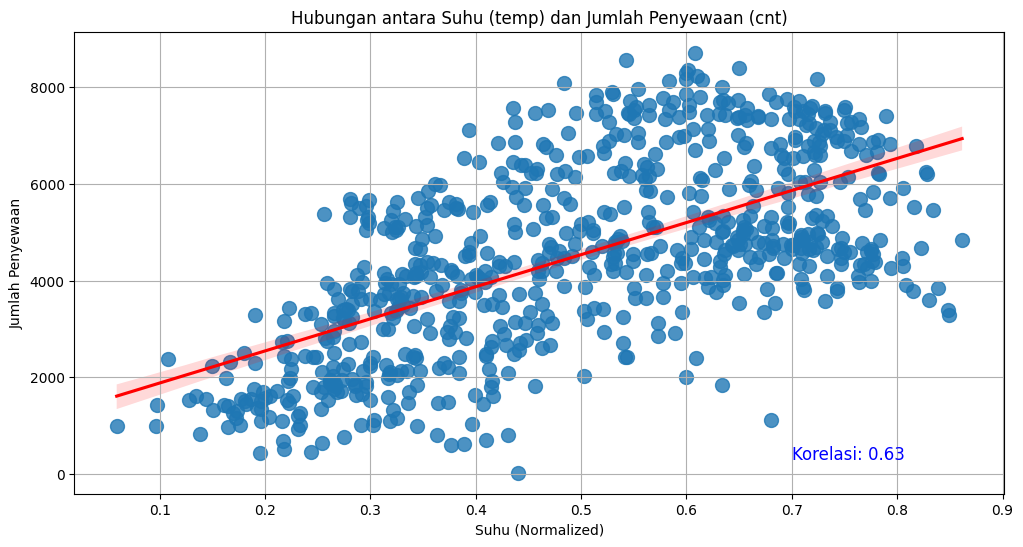

In [55]:
plt.figure(figsize=(12, 6))
sns.regplot(data=day_df, x='temp', y='cnt', scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Hubungan antara Suhu (temp) dan Jumlah Penyewaan (cnt)')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()

plt.text(0.7, 300, f'Korelasi: {korelasi:.2f}', fontsize=12, color='blue')

plt.show()

### Pertanyaan 2: pada musim apa yang jumlah penyewaan terbanyak dan sedikit?

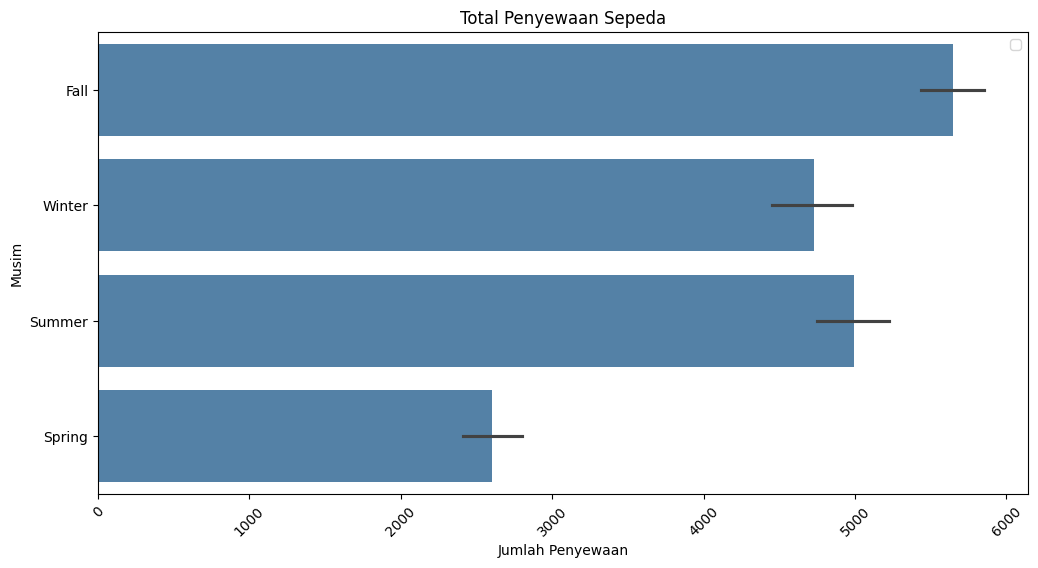

In [56]:
day_df_sorted = day_df.sort_values(by='cnt', ascending=False)
plt.figure(figsize=(12, 6))

sns.barplot(x='cnt', y='label_musim', data=day_df_sorted, color='steelblue')
plt.title('Total Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Musim')
plt.xticks(rotation=45)
plt.legend([])

plt.show()

### Pertanyaan 3: berapakah rata-rata penyewaan sepeda per bulan?

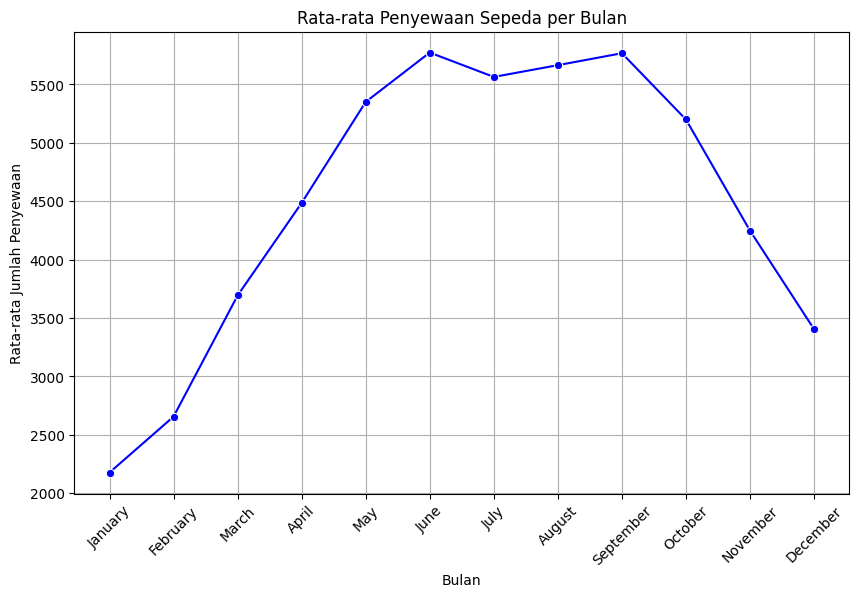

In [57]:
bulan = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

day_df['mnth'] = day_df['mnth'].map(bulan)

monthly_avg = day_df.groupby('mnth')['cnt'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_avg['mnth'] = pd.Categorical(monthly_avg['mnth'], categories=month_order, ordered=True)
monthly_avg = monthly_avg.sort_values('mnth')

plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_avg, marker='o', color='blue')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Conclusion

- Conclution pertanyaan 1 apakah suhu(temp) berpengaruh terhadap penyewaan?

  Dari hasil grafik diatas, bahwa terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda. Ketika suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat.

---






- Conclution pertanyaan 2 pada musim apa yang jumlah penyewaan terbanyak dan sedikit?

 pada diagram hasil diatas bahwa, total penyewaan sepeda yang terbanyak yaitu ada pada musim gugur(fall) dan yang paling sedikit ada di musim semi(spring). dari hasil ini juga berhubungan dengan pertanyaan pertama.

---


*   Conclution pertanyaan 3 berapakah rata-rata penyewaan sepeda per bulan?
  
  Untuk rata-rata penyewaan sepeda per bulan puncak nya berada pada bulan juni, hasil yang diperoleh ini pun berkaitan dengan musim-musim yang berlangsung selama bulan tertentu.


